#**Finding Body Mass Index (BMI)**

Human Height and Weight are mostly hereditable, but lifestyles, diet, health and environmental factors also play a role in determining individual's physical characteristics. The dataset below contains 200 synthetic records of human heights and weights of 18 years old children. These data were simulated based on a 1993 by a Growth Survey of 200 children from birth to 18 years of age recruited from Maternal and Child Health Centres (MCHC) and schools and were used to develop Hong Kong's current growth charts for weight, height, weight-for-age, weight-for-height and body mass index (BMI). 

In this assesment you will: 

1. Scrape Wikipedia to obtain information 
2. Use pandas to represent the dataset
3. Need to answer the questions in the end of the assignment starting from section 3.2

Use this link to get the Metric BMI formula : https://www.thecalculatorsite.com/articles/health/bmi-formula-for-bmi-calculations.php

Fill your roll Number/Name here : 


In [28]:
#Use this space for imports
# Swapneeth Punna
#2021501006
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


**1. Fetch the Data from the link**

Here is the website link : http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights

In [48]:
#Your code goes here.
url = "http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find("table", {"class": "wikitable"})
rows = table.find_all("tr")

Tables = []
for row in rows:
    cols = row.find_all("td")
    cols = [ele.text.strip() for ele in cols]
    Tables.append([ele for ele in cols if ele])

print(Tables)


[[], ['1', '65.78', '112.99'], ['2', '71.52', '136.49'], ['3', '69.40', '153.03'], ['4', '68.22', '142.34'], ['5', '67.79', '144.30'], ['6', '68.70', '123.30'], ['7', '69.80', '141.49'], ['8', '70.01', '136.46'], ['9', '67.90', '112.37'], ['10', '66.78', '120.67'], ['11', '66.49', '127.45'], ['12', '67.62', '114.14'], ['13', '68.30', '125.61'], ['14', '67.12', '122.46'], ['15', '68.28', '116.09'], ['16', '71.09', '140.00'], ['17', '66.46', '129.50'], ['18', '68.65', '142.97'], ['19', '71.23', '137.90'], ['20', '67.13', '124.04'], ['21', '67.83', '141.28'], ['22', '68.88', '143.54'], ['23', '63.48', '97.90'], ['24', '68.42', '129.50'], ['25', '67.63', '141.85'], ['26', '67.21', '129.72'], ['27', '70.84', '142.42'], ['28', '67.49', '131.55'], ['29', '66.53', '108.33'], ['30', '65.44', '113.89'], ['31', '69.52', '103.30'], ['32', '65.81', '120.75'], ['33', '67.82', '125.79'], ['34', '70.60', '136.22'], ['35', '71.80', '140.10'], ['36', '69.21', '128.75'], ['37', '66.80', '141.80'], ['38',

**2. Extract tabular data from the web content**

Use beautiful soup to extract the information, store them information in variable *tables*

In [ ]:
#Your code goes here.
Tables=[[], ['1', '65.78', '112.99'], ['2', '71.52', '136.49'], ['3', '69.40', '153.03'], ['4', '68.22', '142.34'], ['5', '67.79', '144.30'], ['6', '68.70', '123.30'], ['7', '69.80', '141.49'], ['8', '70.01', '136.46'], ['9', '67.90', '112.37'], ['10', '66.78', '120.67'], ['11', '66.49', '127.45'], ['12', '67.62', '114.14'], ['13', '68.30', '125.61'], ['14', '67.12', '122.46'], ['15', '68.28', '116.09'], ['16', '71.09', '140.00'], ['17', '66.46', '129.50'], ['18', '68.65', '142.97'], ['19', '71.23', '137.90'], ['20', '67.13', '124.04'], ['21', '67.83', '141.28'], ['22', '68.88', '143.54'], ['23', '63.48', '97.90'], ['24', '68.42', '129.50'], ['25', '67.63', '141.85'], ['26', '67.21', '129.72'], ['27', '70.84', '142.42'], ['28', '67.49', '131.55'], ['29', '66.53', '108.33'], ['30', '65.44', '113.89'], ['31', '69.52', '103.30'], ['32', '65.81', '120.75'], ['33', '67.82', '125.79'], ['34', '70.60', '136.22'], ['35', '71.80', '140.10'], ['36', '69.21', '128.75'], ['37', '66.80', '141.80'], ['38', '67.66', '121.23'], ['39', '67.81', '131.35'], ['40', '64.05', '106.71'], ['41', '68.57', '124.36'], ['42', '65.18', '124.86'], ['43', '69.66', '139.67'], ['44', '67.97', '137.37'], ['45', '65.98', '106.45'], ['46', '68.67', '128.76'], ['47', '66.88', '145.68'], ['48', '67.70', '116.82'], ['49', '69.82', '143.62'], ['50', '69.09', '134.93'], ['51', '69.91', '147.02'], ['52', '67.33', '126.33'], ['53', '70.27', '125.48'], ['54', '69.10', '115.71'], ['55', '65.38', '123.49'], ['56', '70.18', '147.89'], ['57', '70.41', '155.90'], ['58', '66.54', '128.07'], ['59', '66.36', '119.37'], ['60', '67.54', '133.81'], ['61', '66.50', '128.73'], ['62', '69.00', '137.55'], ['63', '68.30', '129.76'], ['64', '67.01', '128.82'], ['65', '70.81', '135.32'], ['66', '68.22', '109.61'], ['67', '69.06', '142.47'], ['68', '67.73', '132.75'], ['69', '67.22', '103.53'], ['70', '67.37', '124.73'], ['71', '65.27', '129.31'], ['72', '70.84', '134.02'], ['73', '69.92', '140.40'], ['74', '64.29', '102.84'], ['75', '68.25', '128.52'], ['76', '66.36', '120.30'], ['77', '68.36', '138.60'], ['78', '65.48', '132.96'], ['79', '69.72', '115.62'], ['80', '67.73', '122.52'], ['81', '68.64', '134.63'], ['82', '66.78', '121.90'], ['83', '70.05', '155.38'], ['84', '66.28', '128.94'], ['85', '69.20', '129.10'], ['86', '69.13', '139.47'], ['87', '67.36', '140.89'], ['88', '70.09', '131.59'], ['89', '70.18', '121.12'], ['90', '68.23', '131.51'], ['91', '68.13', '136.55'], ['92', '70.24', '141.49'], ['93', '71.49', '140.61'], ['94', '69.20', '112.14'], ['95', '70.06', '133.46'], ['96', '70.56', '131.80'], ['97', '66.29', '120.03'], ['98', '63.43', '123.10'], ['99', '66.77', '128.14'], ['100', '68.89', '115.48'], ['101', '64.87', '102.09'], ['102', '67.09', '130.35'], ['103', '68.35', '134.18'], ['104', '65.61', '98.64'], ['105', '67.76', '114.56'], ['106', '68.02', '123.49'], ['107', '67.66', '123.05'], ['108', '66.31', '126.48'], ['109', '69.44', '128.42'], ['110', '63.84', '127.19'], ['111', '67.72', '122.06'], ['112', '70.05', '127.61'], ['113', '70.19', '131.64'], ['114', '65.95', '111.90'], ['115', '70.01', '122.04'], ['116', '68.61', '128.55'], ['117', '68.81', '132.68'], ['118', '69.76', '136.06'], ['119', '65.46', '115.94'], ['120', '68.83', '136.90'], ['121', '65.80', '119.88'], ['122', '67.21', '109.01'], ['123', '69.42', '128.27'], ['124', '68.94', '135.29'], ['125', '67.94', '106.86'], ['126', '65.63', '123.29'], ['127', '66.50', '109.51'], ['128', '67.93', '119.31'], ['129', '68.89', '140.24'], ['130', '70.24', '133.98'], ['131', '68.27', '132.58'], ['132', '71.23', '130.70'], ['133', '69.10', '115.56'], ['134', '64.40', '123.79'], ['135', '71.10', '128.14'], ['136', '68.22', '135.96'], ['137', '65.92', '116.63'], ['138', '67.44', '126.82'], ['139', '73.90', '151.39'], ['140', '69.98', '130.40'], ['141', '69.52', '136.21'], ['142', '65.18', '113.40'], ['143', '68.01', '125.33'], ['144', '68.34', '127.58'], ['145', '65.18', '107.16'], ['146', '68.26', '116.46'], ['147', '68.57', '133.84'], ['148', '64.50', '112.89'], ['149', '68.71', '130.76'], ['150', '68.89', '137.76'], ['151', '69.54', '125.40'], ['152', '67.40', '138.47'], ['153', '66.48', '120.82'], ['154', '66.01', '140.15'], ['155', '72.44', '136.74'], ['156', '64.13', '106.11'], ['157', '70.98', '158.96'], ['158', '67.50', '108.79'], ['159', '72.02', '138.78'], ['160', '65.31', '115.91'], ['161', '67.08', '146.29'], ['162', '64.39', '109.88'], ['163', '69.37', '139.05'], ['164', '68.38', '119.90'], ['165', '65.31', '128.31'], ['166', '67.14', '127.24'], ['167', '68.39', '115.23'], ['168', '66.29', '124.80'], ['169', '67.19', '126.95'], ['170', '65.99', '111.27'], ['171', '69.43', '122.61'], ['172', '67.97', '124.21'], ['173', '67.76', '124.65'], ['174', '65.28', '119.52'], ['175', '73.83', '139.30'], ['176', '66.81', '104.83'], ['177', '66.89', '123.04'], ['178', '65.74', '118.89'], ['179', '65.98', '121.49'], ['180', '66.58', '119.25'], ['181', '67.11', '135.02'], ['182', '65.87', '116.23'], ['183', '66.78', '109.17'], ['184', '68.74', '124.22'], ['185', '66.23', '141.16'], ['186', '65.96', '129.15'], ['187', '68.58', '127.87'], ['188', '66.59', '120.92'], ['189', '66.97', '127.65'], ['190', '68.08', '101.47'], ['191', '70.19', '144.99'], ['192', '65.52', '110.95'], ['193', '67.46', '132.86'], ['194', '67.41', '146.34'], ['195', '69.66', '145.59'], ['196', '65.80', '120.84'], ['197', '66.11', '115.78'], ['198', '68.24', '128.30'], ['199', '68.02', '127.47'], ['200', '71.39', '127.88']]

**3.1 Creating Dataframe**

After extracting, cleaning the information from the webpage, create DataFrame and store it in variable as *df_heights_weights* which has 3 columns naming index, heights, weights.


In [17]:
df_heights_weights = pd.DataFrame(Tables, columns=["index", "heights", "weights"])
# Clean the data
df_heights_weights = df_heights_weights.dropna()
df_heights_weights[["heights", "weights"]] = df_heights_weights[["heights", "weights"]].astype(float)

print(df_heights_weights.head())

  index  heights  weights
1     1    65.78   112.99
2     2    71.52   136.49
3     3    69.40   153.03
4     4    68.22   142.34
5     5    67.79   144.30


**3.2 Find the maximum height in the dataframe**

In [19]:
#Your code goes here.
max_height = df_heights_weights['heights'].max()
print(max_height)

73.9


**3.3 Find the maximum weight in the dataframe**

In [20]:
#Your code goes here.
max_weight = df_heights_weights['weights'].max()
print(max_weight)

158.96


**3.4 Plot the height to weight for first 15 entries, after sorting the data based upon the weights**

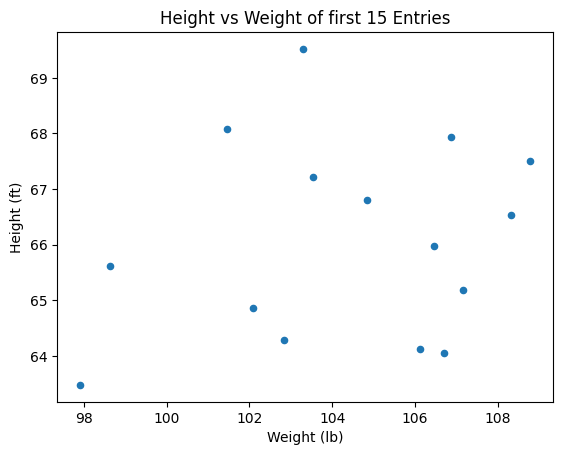

In [29]:
#Your code goes here.
# sorting the data based on weight
df = df_heights_weights.sort_values(by='weights')

# plotting the height and weight for the first 15 entries
df[:15].plot(x='weights', y='heights', kind='scatter')

# add labels and title to the plot
plt.xlabel('Weight (lb)')
plt.ylabel('Height (ft)')
plt.title('Height vs Weight of first 15 Entries')

# show the plot
plt.show()

**3.5 Calculate the BMI for the DataFrame, by including a new column as BMI**

Link to know the conversion of inch to meter : https://www.metric-conversions.org/length/inches-to-meters.htm

Link to know the conversion of pound to kg : https://www.metric-conversions.org/weight/pounds-to-kilograms.htm

Use this link to get the Metric BMI formula : https://www.thecalculatorsite.com/articles/health/bmi-formula-for-bmi-calculations.php

In [43]:
#Your code goes here.
df_heights_weights['BMI'] = df_heights_weights['weights'] / (df_heights_weights['heights'] ** 2) *703
print(df_heights_weights)

    index  heights  weights        BMI
1       1    65.78   112.99  18.357249
2       2    71.52   136.49  18.758631
3       3    69.40   153.03  22.336389
4       4    68.22   142.34  21.501010
5       5    67.79   144.30  22.074475
..    ...      ...      ...        ...
196   196    65.80   120.84  19.620689
197   197    66.11   115.78  18.623211
198   198    68.24   128.30  19.368855
199   199    68.02   127.47  19.368235
200   200    71.39   127.88  17.639375

[200 rows x 4 columns]


**3.6 Below you can find the information of the categories and BMI values, Use this to get the count of category for Obesity Class 2**

* Underweight	                         (<18.5)
* Normal weight	                      (18.5-24.9)
* Overweight	                           (25-29.9)
* Obesity Class 1	                    (30-34.9)
* Obesity Class 2	                    (35-39.9)
* Extreme Obesity Class 3	     (>40)

In [46]:
#Your code goes here.
obesity_class_2 = ((df_heights_weights['BMI'] >= 35) & (df_heights_weights['BMI'] <= 39.9)).sum()
print("Count of people with Obesity Class 2:", obesity_class_2)

Count of people with Obesity Class 2: 0
